In [1]:
pip install pytesseract

  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

# pipelines
from sklearn.pipeline import Pipeline

# NLP transformers
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# classifiers you can use
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# model selection bits
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold

# evaluation
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# plotting
from plotting import plot_learning_curve, plot_validation_curve
from sklearn.model_selection import learning_curve, validation_curve
#displaying confusion metrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('twitter_parsed_dataset.csv')

In [3]:
data = data.dropna(axis=0)

In [4]:
data.head()

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37110 entries, 0 to 37112
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       37110 non-null  object 
 1   id          37110 non-null  object 
 2   Text        37110 non-null  object 
 3   Annotation  37110 non-null  object 
 4   oh_label    37110 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [6]:
# Path to the input CSV file
input_file = 'twitter_sexism_parsed_dataset.csv'

# Path to the existing CSV file
output_file = 'twitter_parsed_dataset.csv'

# Read the input CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Filter rows with 'oh_label' equal to 1
filtered_df = df[df['oh_label'] == 1]

# Append the filtered DataFrame to the output CSV file
filtered_df.to_csv(output_file, mode='a', index=False, header=False)

print("bullying words are appended to", output_file)

bullying words are appended to twitter_parsed_dataset.csv


In [7]:
data = pd.read_csv('twitter_parsed_dataset.csv')

In [7]:
data = data.dropna(axis=0)

In [8]:
# droping the index, annotation, oh_label, and id columns using pandas.drop()
X = data.drop(['index','Annotation','oh_label','id'], axis=1)
y = data['oh_label']

In [9]:
X = data['Text']

In [10]:
# # Assuming 'df' is your DataFrame containing the data
# data = data.dropna(subset=['oh_label'], axis=0)


In [11]:
data.oh_label.value_counts()

1.0    25609
0.0    11501
Name: oh_label, dtype: int64

In [12]:
data['oh_label'].isnull().sum()

0

In [13]:
clf = RandomForestClassifier()

In [14]:
# # Assuming 'df' is your DataFrame containing the data
# target_column_mean = df['oh_label'].mean()
# df['oh_label'] = df['oh_label'].fillna(target_column_mean)


In [15]:
X_train, X_test, y_train,y_test = train_test_split(X, y, stratify = y, random_state=2023,test_size=0.5)

In [16]:
count_vector = CountVectorizer()

In [17]:
count_vector.fit(X_train)
count_vector.vocabulary_;

In [18]:
len(count_vector.vocabulary_)

18821

In [19]:
X_train_vector = count_vector.transform(X_train)
X_test_vector = count_vector.transform(X_test)

In [20]:
dummy = DummyClassifier(strategy = 'uniform')
scores = cross_val_score(dummy,X_train_vector,y_train,cv=3,scoring='f1')
print(f"{scores.mean()} is the mean F1 Score")

0.5806196980387446 is the mean F1 Score


In [21]:
# create the pipeline
dt_pipe = Pipeline([('vect', CountVectorizer(ngram_range=(1,1))),('clf', clf)])

# pass the pipeline as if it was the classifier into a cross validation method
# the cv method will automatically figure out what to do.
scores = cross_val_score(dt_pipe, X_train, y_train, cv=5, scoring = 'f1')
print(f"the mean score is: {scores.mean()}")
print("The scores were:", scores)

the mean score is: 0.9425062403470095
The scores were: [0.94873757 0.9395667  0.94381592 0.93889943 0.94151158]


In [22]:
# let's make unigrams and bigrams
count = CountVectorizer(ngram_range=(1,2))
dt_pipe = Pipeline([('vect', count),('clf', clf)])
scores = cross_val_score(dt_pipe, X_train, y_train, cv=5, scoring = 'f1')
print(scores.mean())
scores

0.9427434820688537


array([0.94324479, 0.94061667, 0.94694193, 0.94106464, 0.94184938])

In [23]:
len(count.fit(X_train).vocabulary_)

103329

In [26]:
# let's make unigrams , and TF-IDF we will limit to 10k features
count = CountVectorizer(ngram_range=(1,1), max_features=10_000) 
#tf-idf
tfidf = TfidfTransformer()

dt_pipe = Pipeline([('vect', count),('tfidf',tfidf),('clf', clf)])
scores = cross_val_score(dt_pipe, X_train, y_train, cv=5, scoring = 'f1')
print(scores.mean())
scores

0.9408833664089572


array([0.94956855, 0.93793103, 0.94160584, 0.9359924 , 0.939319  ])

In [27]:
#evaluation metrics for unigram and TF-IDF
def metrics(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true,y_pred)
    print(f"Recall is: {recall:.4f}")
    print(f"Precision is:{precision:.4f}")
    print(f"Accuracy is:{accuracy:.4f}")
    print(f"confusion martrix is")
    print(confusion)

In [28]:
#RandomForestClassifier
clf.fit(X_train_vector, y_train)
train_pred = clf.predict(X_train_vector)
test_pred = clf.predict(X_test_vector)

In [29]:
#training score
print("Training Score")
metrics(y_train,train_pred)

Training Score
Recall is: 1.0000
Precision is:1.0000
Accuracy is:1.0000
confusion martrix is
[[ 5751     0]
 [    0 12804]]


In [30]:
#testing score of Randomforest
print("testing score")
metrics(y_test,test_pred)

testing score
Recall is: 0.9706
Precision is:0.9344
Accuracy is:0.9327
confusion martrix is
[[ 4878   872]
 [  376 12429]]


In [31]:
#SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0)  
svm_classifier.fit(X_train_vector, y_train)


SVC(kernel='linear')

In [32]:
#y_train_pred=lgbm_model.predict(X_train_vector)
#y_test_pred=lgbm_model.predict(X_test_vector)
y_train_pred_svm = svm_classifier.predict(X_train_vector)
y_test_pred_svm = svm_classifier.predict(X_test_vector)

In [33]:
#testing score of SVM 
print("Testing Score")
metrics(y_test,y_test_pred_svm)

Testing Score
Recall is: 0.9717
Precision is:0.9325
Accuracy is:0.9319
confusion martrix is
[[ 4849   901]
 [  363 12442]]


In [34]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vector, y_train)

MultinomialNB()

In [35]:
y_pred_test_nb = nb_classifier.predict(X_test_vector)

In [36]:
#testing score of NB 
print("Testing Score")
metrics(y_test,y_pred_test_nb)

Testing Score
Recall is: 0.9360
Precision is:0.8804
Accuracy is:0.8681
confusion martrix is
[[ 4121  1629]
 [  819 11986]]


In [37]:
y_test.value_counts()

1.0    12805
0.0     5750
Name: oh_label, dtype: int64

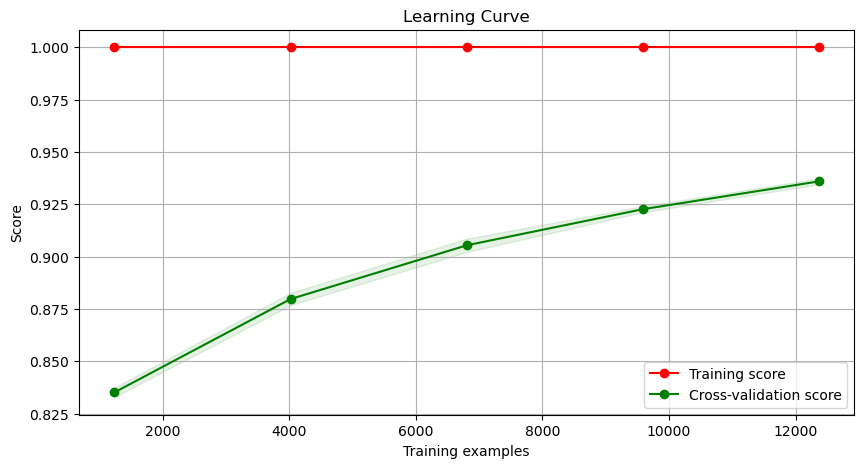

In [38]:
#ploting learning curve
cv = StratifiedKFold(n_splits = 3)
learning_curve = plot_learning_curve(clf, X_train_vector,y_train,cv=cv,scoring='f1')

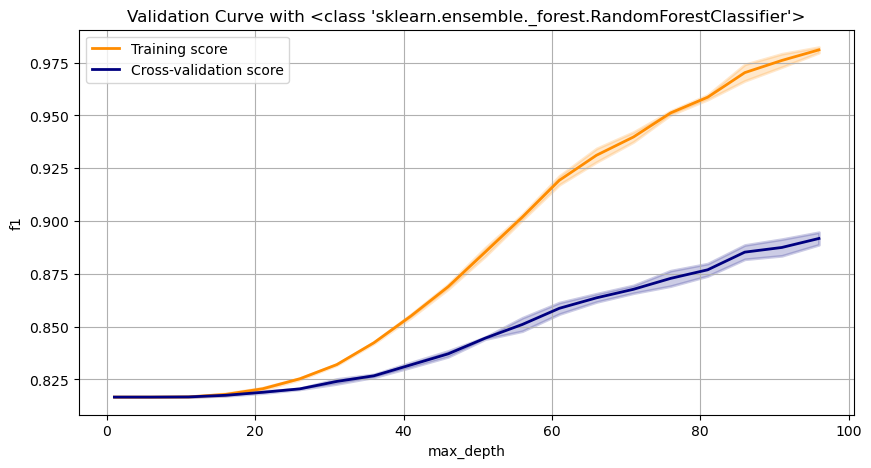

In [39]:
validation_curve1= plot_validation_curve(clf,X_train_vector,y_train,scoring='f1',cv = cv,param_name='max_depth',param_range=np.arange(1,100,5))

In [31]:
pip install opencv-python



     ---------------------------------------- 38.1/38.1 MB 1.1 MB/s eta 0:00:00


<class 'str'>


go
fuck
yourself



  (0, 0)	0.5773502691896258
  (0, 1)	0.5773502691896258
  (0, 2)	0.5773502691896258


<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

[0.]


The image is not bullying.
